In [2]:
import numpy as np
#from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# for the random seed
import tensorflow as tf

# set the random seeds to get reproducible results
np.random.seed(1)
tf.set_random_seed(2)

import numpy as np
tmp = np.load('mnist.npz')
X = tmp['X']
y = tmp['y']
X, y = X[:1000], y[:1000]
X = X.reshape(X.shape[0], 28, 28, 1)


# Normalize
X = X / 255.
# number of unique classes
num_classes = len(np.unique(y))

y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)


num_tot = y.shape[0]
num_train = y_train.shape[0]
num_test = y_test.shape[0]

y_oh = np.zeros((num_tot, num_classes))
y_oh[range(num_tot), y] = 1

# Print out a few rows of y.
print('Rows of y', y[0:5] )
# Print out a few rows of y_oh.
print('Rows of y_oh after np.zeros transformation ', y_oh[0:5] )

y_oh_train = np.zeros((num_train, num_classes))
y_oh_train[range(num_train), y_train] = 1

y_oh_test = np.zeros((num_test, num_classes))
y_oh_test[range(num_test), y_test] = 1


Rows of y [5 0 4 1 9]
Rows of y_oh after np.zeros transformation  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.optimizers import Adadelta
from keras.optimizers import Adam
from keras.optimizers import Adagrad
import tensorflow
from keras.callbacks import *
from clr_callback import *
import timeit
%matplotlib inline
import matplotlib.pyplot as plt


model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.))
model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.))
model.add(Dense(10, activation='softmax'))

In [7]:
lrlist= [0.00145]

for i in range(len(lrlist)):
    
    adam = Adam(lr=lrlist[i])
    # Compile the model

    model.compile(loss='categorical_crossentropy', optimizer=adam)
    
    # Train the model
    adam_hist = model.fit(X_train, y_oh_train, batch_size=32, epochs=20)

    # Evaluate performance
    test_loss = model.evaluate(X_test, y_oh_test, batch_size=32)

    predictions = model.predict(X_test, batch_size=32)
    predictions = np.argmax(predictions, axis=1) # change encoding again
    print('Accuracy of Adam optimizer when lr =',lrlist[i],'is', (predictions == y_test).sum() / predictions.shape[0]) 
   

Epoch 1/20
800/800 [==============================] - 2s 2ms/step - loss: 1.7081
Epoch 2/20
800/800 [==============================] - 1s 1ms/step - loss: 0.6365
Epoch 3/20
800/800 [==============================] - 1s 1ms/step - loss: 0.3865
Epoch 4/20
800/800 [==============================] - 1s 1ms/step - loss: 0.2851
Epoch 5/20
800/800 [==============================] - 1s 1ms/step - loss: 0.2195
Epoch 6/20
800/800 [==============================] - 1s 1ms/step - loss: 0.1711
Epoch 7/20
800/800 [==============================] - 1s 1ms/step - loss: 0.1388
Epoch 8/20
800/800 [==============================] - 1s 1ms/step - loss: 0.0962
Epoch 9/20
800/800 [==============================] - 1s 1ms/step - loss: 0.0813
Epoch 10/20
800/800 [==============================] - 1s 1ms/step - loss: 0.0742
Epoch 11/20
800/800 [==============================] - 1s 1ms/step - loss: 0.0484
Epoch 12/20
800/800 [==============================] - 1s 1ms/step - loss: 0.0316
Epoch 13/20
800/800 [====

Text(0.5, 0, 'epochs')

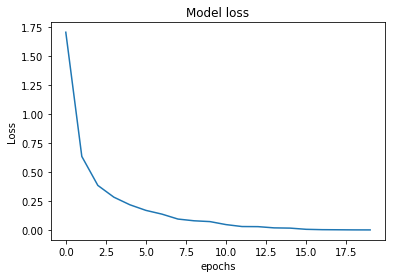

In [8]:
plt.plot(adam_hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('epochs') 